<a href="https://colab.research.google.com/github/Riverag0011/ADS-504-02-Machine-Learning-Deep-Learning-For-Data-Science/blob/main/Assignment_2_1_Exercises_Code_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2.1: Exercises Code**


---

Name: Gabi Rivera
\
Date: 07Jul2024
\
Course: ADS504-02

In [ ]:
# Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#!pip install klib
import klib
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from tabulate import tabulate

## **2. Decision Trees**

## 2.1. Animal Control/Shelter Data:
`    The goal is to develop a classification model for the shelter dataset.`

### Data Preparation

In [ ]:
# Upload animal shelter data set
df = pd.read_csv('shelter_data.csv')
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [ ]:
# General information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnimalID        26729 non-null  object
 1   Name            19038 non-null  object
 2   DateTime        26729 non-null  object
 3   OutcomeType     26729 non-null  object
 4   OutcomeSubtype  13117 non-null  object
 5   AnimalType      26729 non-null  object
 6   SexuponOutcome  26728 non-null  object
 7   AgeuponOutcome  26711 non-null  object
 8   Breed           26729 non-null  object
 9   Color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


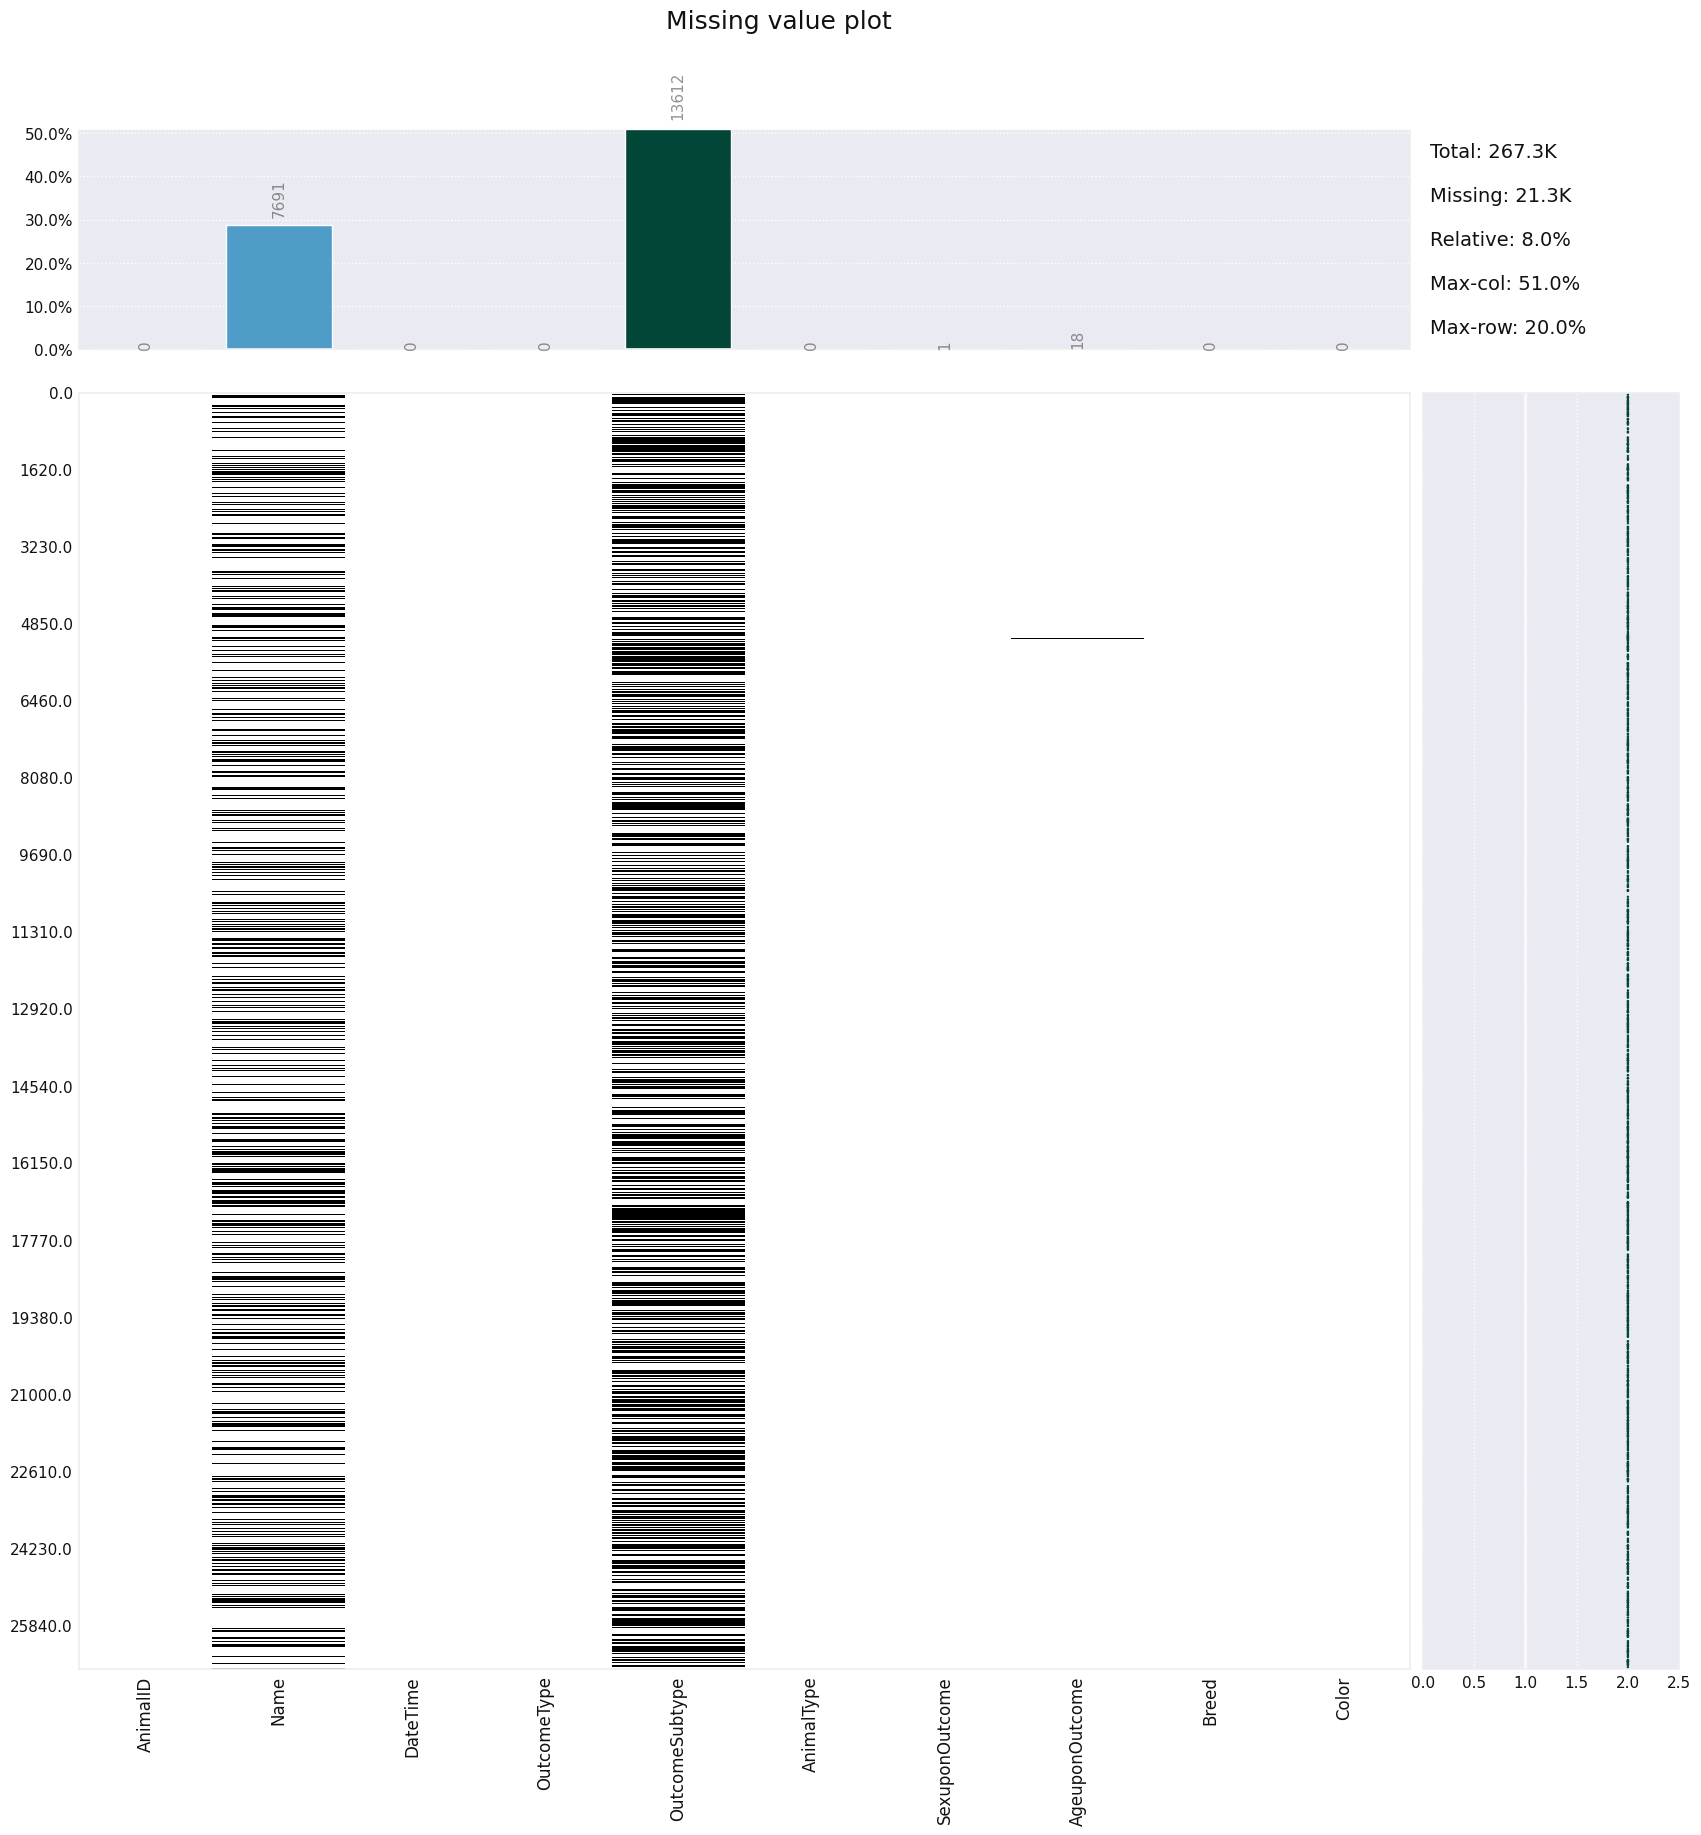

In [ ]:
# Visualize missing values
klib.missingval_plot(df)

# Remove unnecessary variables (AnimalID, Name & DateTime) and variables with >50% missing values (OutcomeSubtype)
columns_to_drop = ['AnimalID','Name' ,'DateTime','OutcomeSubtype']
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# Impute missing values
df_imputed = df_cleaned.fillna(df_cleaned.mode().iloc[0])
klib.missingval_plot(df_imputed)
df_imputed.info()

No missing values found in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OutcomeType     26729 non-null  object
 1   AnimalType      26729 non-null  object
 2   SexuponOutcome  26729 non-null  object
 3   AgeuponOutcome  26729 non-null  object
 4   Breed           26729 non-null  object
 5   Color           26729 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [ ]:
outcome_types = df_imputed['OutcomeType'].unique()
print(outcome_types)


['Return_to_owner' 'Euthanasia' 'Adoption' 'Transfer' 'Died']


In [ ]:
# Ordinal encoding: Convert objects to numerical data type
X_data = df_imputed.drop('OutcomeType', axis=1)
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(X_data)
X_encoded_df = pd.DataFrame(X_encoded, columns=X_data.columns)

# Convert outcome label to numerical
y_data = df_imputed['OutcomeType']
le = LabelEncoder()
y_encoded = le.fit_transform(y_data)

df_encoded = pd.concat([X_encoded_df, pd.Series(y_encoded, name='OutcomeType')], axis=1)
df_encoded.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,OutcomeType
0,1.0,2.0,5.0,1221.0,130.0,3
1,0.0,3.0,5.0,640.0,167.0,2
2,1.0,2.0,21.0,1066.0,86.0,0
3,0.0,1.0,25.0,640.0,42.0,4
4,1.0,2.0,21.0,914.0,274.0,4


In [ ]:
# Shuffle and split data set
np.random.seed(42)

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(df_encoded,
                                              df_encoded["OutcomeType"]):
    strat_train_set_n = df_encoded.iloc[train_index]
    strat_test_set_n = df_encoded.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

    strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
# Proportion of each OutcomeType class of the train set
strat_train_set["OutcomeType"].value_counts() / len(strat_train_set)

OutcomeType
0    0.402873
4    0.352514
3    0.179063
2    0.058141
1    0.007408
Name: count, dtype: float64

### 2.1.a. Create a Decision Tree

In [ ]:
# Prepare outcome and predictors
columns_to_drop = ['OutcomeType']
X = strat_train_set.drop(columns_to_drop, axis=1)
X = pd.DataFrame(X)
y = strat_train_set['OutcomeType']

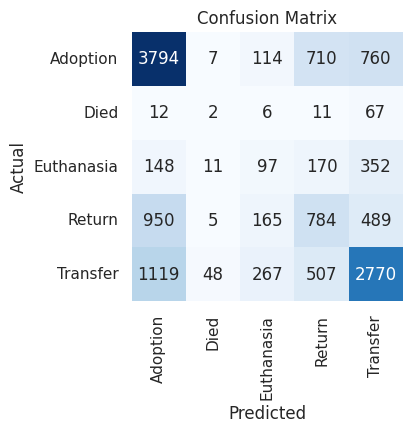

In [ ]:
# Import decision tree model
tree = DecisionTreeClassifier().fit(X, y)

# Predict using test set
X_test = strat_test_set.drop(columns_to_drop, axis=1)
X_test = pd.DataFrame(X_test)
y_pred0 = tree.predict(X_test)

# Compute confusion matrix
y_test = strat_test_set['OutcomeType']
cm0 = confusion_matrix(y_test, y_pred0)

# Define labels for rows and columns
class_labels = ['Adoption', 'Died','Euthanasia', 'Return', 'Transfer']
cm_df0 = pd.DataFrame(cm0, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df0, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

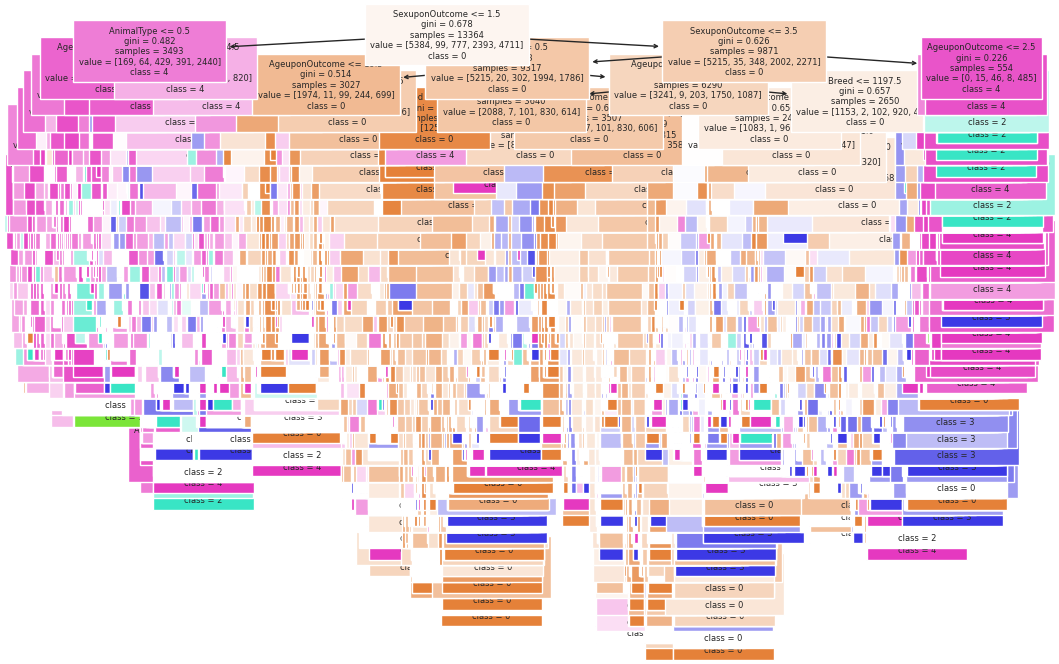

In [ ]:
# Convert feature and class names to string if they are not already
feature_names = X.columns.astype(str).tolist()
class_names = tree.classes_.astype(str).tolist()

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=feature_names,
          class_names=class_names, fontsize = 6)
plt.show()

### 2.1.b. Create a Decision Tree with max_depth = 3

○ short_tree = tree.DecisionTreeClassifier(max_depth=3)\
○ And then, use the scikit-learn functions to train and test this decision tree, including plotting the confusion matrix (as above) and plotting the smaller decision tree.

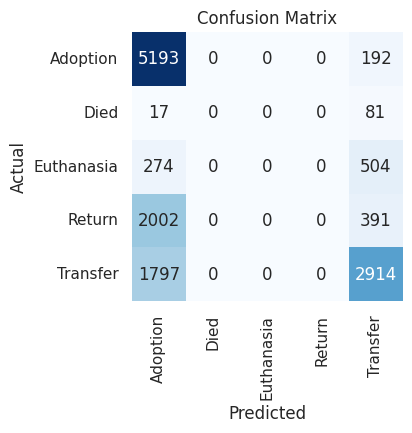

In [ ]:
# Import decision tree model
short_tree = DecisionTreeClassifier(max_depth=3).fit(X, y)

# Predict using test set
y_pred1 = short_tree.predict(X_test)

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Define labels for rows and columns
class_labels = ['Adoption', 'Died','Euthanasia', 'Return', 'Transfer']
cm_df1 = pd.DataFrame(cm1, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

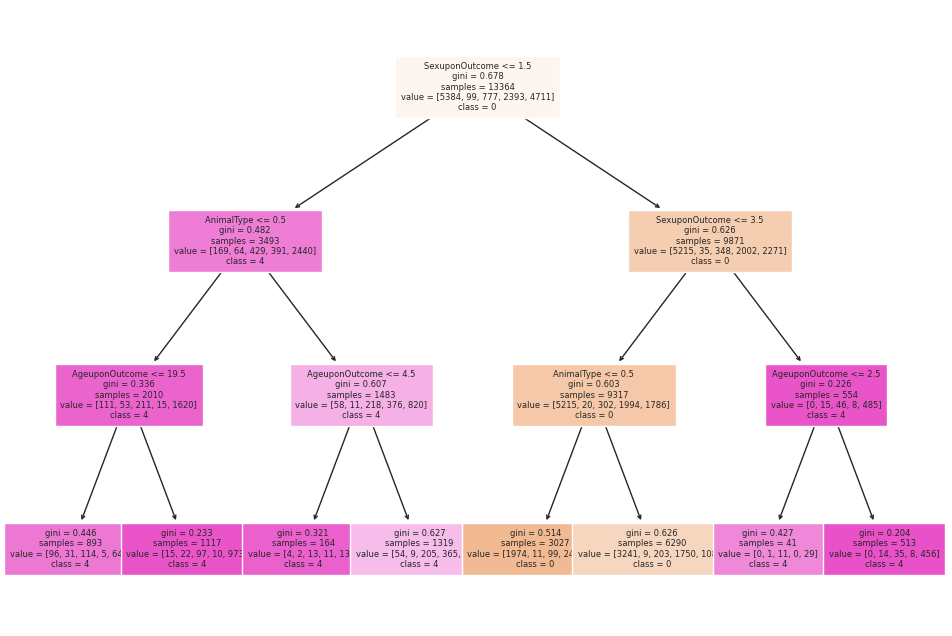

In [ ]:
# Convert feature and class names to string if they are not already
feature_names = X.columns.astype(str).tolist()
class_names = short_tree.classes_.astype(str).tolist()

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(short_tree, filled=True, feature_names=feature_names,
          class_names=class_names, fontsize = 6)
plt.show()

### 2.1.c. Train and Test Set Errors with Varying Depth
Vary the decision tree depth in a loop, increasing depth from 3 to 10. Make a plot of training and test set error as the decision tree depth is varied.

On the x-axis should be your depth parameter and on the y-axis the error. Plot both the training and test set error as two separate curves. Label your plot and give it a legend. Write a small description (two sentences) in a markdown cell below this plot, explaining what it is.

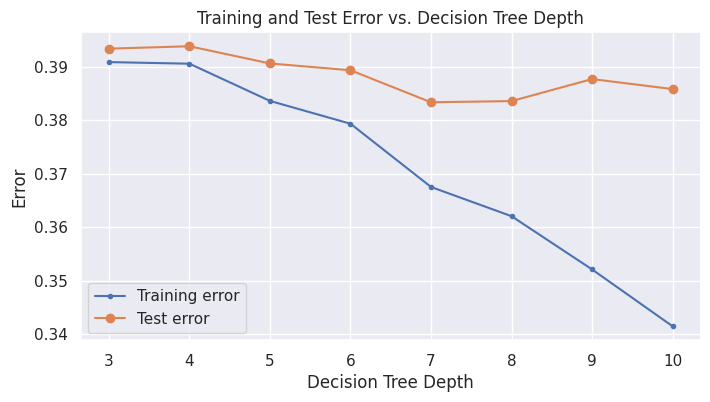

In [ ]:
# Initialize lists to store errors
train_errors = []
test_errors = []

# Define depths to iterate over
depths = range(3, 11)

for depth in depths:
    # Create decision tree model with varying depth
    tree = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Predict on training set
    y_train_pred = tree.predict(X)
    train_error = 1 - accuracy_score(y, y_train_pred)
    train_errors.append(train_error)

    # Predict on test set
    y_pred2 = tree.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred2)
    test_errors.append(test_error)

# Plot the errors
plt.figure(figsize=(8, 4))
plt.plot(depths, train_errors, marker='.', label='Training error')
plt.plot(depths, test_errors, marker='o', label='Test error')
plt.title('Training and Test Error vs. Decision Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

The plot shows the misclassification rate or classification error rate when using train and test sets as decision tree increases from 3 to 10. Although, it's relatively similar across, the best error rate seems to be at 7 decision tree depth for the test set while the train set is still improving at 10.

### 2.1.d. Use pruning to control the complexity of the decision tree

Plot a pruned decision tree. A good value for ccp_alpha is the mean, about 0.0007

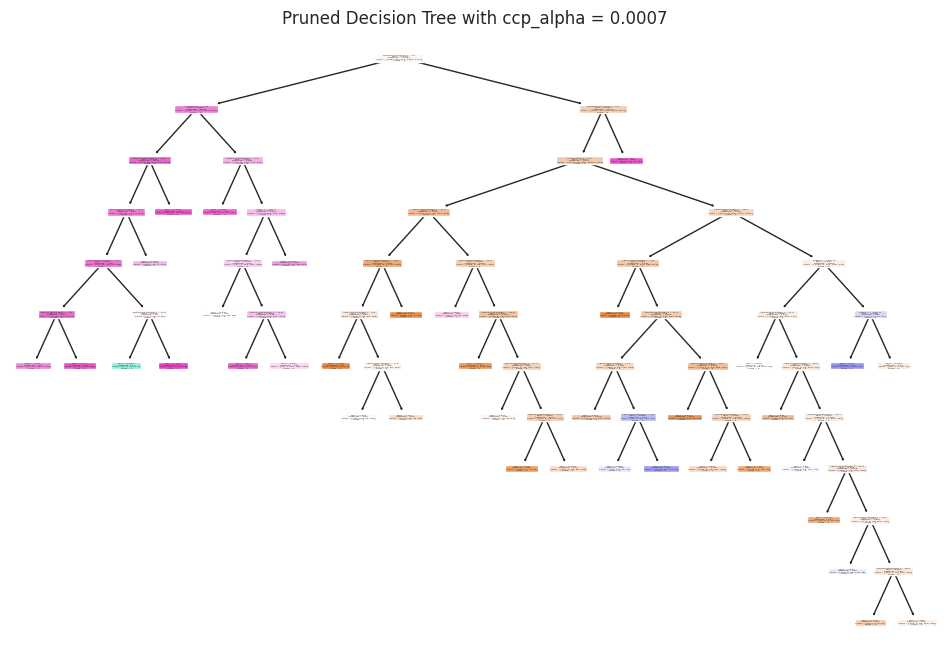

In [ ]:
# Determine a good value for ccp_alpha
# For example, using 0.0007 as the ccp_alpha
ccp_alphas, impurities = tree.cost_complexity_pruning_path(X, y)
ccp_alpha = 0.0007

# Prune the tree
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
pruned_tree.fit(X, y)

# Plot the pruned tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=feature_names,
          class_names=class_names)
plt.title(f"Pruned Decision Tree with ccp_alpha = {ccp_alpha}")
plt.show()

### 2.1.e. Pruned vs UnPruned Accuracy

In [ ]:
# Calculate Accuracies
y_pred3 = tree.predict(X_test)
pruned_accu = accuracy_score(y_test, y_pred3)
dt_accu = accuracy_score(y_test, y_pred0)
dt3_accu = accuracy_score(y_test, y_pred1)

# Creat a table with headers and data
table = [
    {"Model": "Pruned Decision Tree", "Accuracy": pruned_accu},
    {"Model": "Unpruned Decision Tree", "Accuracy": dt_accu},
    {"Model": "Decision Tree (max_depth=3)", "Accuracy": dt3_accu}]

# Printing the table
print(tabulate(table, headers="keys", floatfmt=".4f"))

Model                          Accuracy
---------------------------  ----------
Pruned Decision Tree             0.6141
Unpruned Decision Tree           0.5572
Decision Tree (max_depth=3)      0.6066


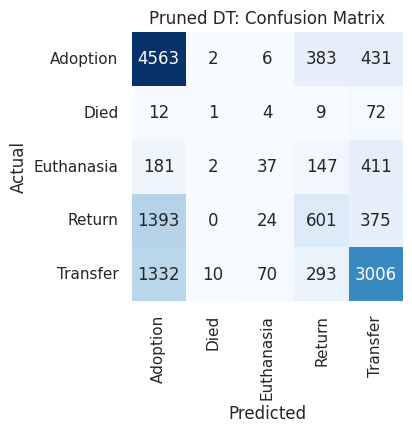

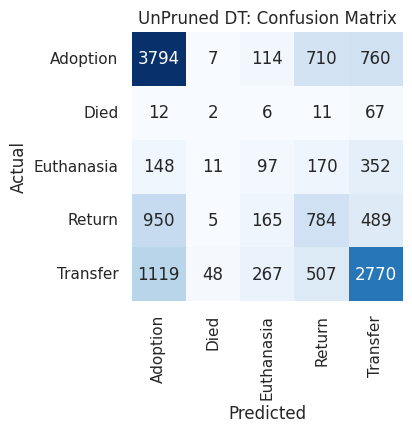

In [ ]:
# Pruned Decision Tree Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Define labels for rows and columns
class_labels = ['Adoption', 'Died','Euthanasia', 'Return', 'Transfer']
cm_df3 = pd.DataFrame(cm3, index=class_labels, columns=class_labels)

# Pruned Decision Tree: Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Pruned DT: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# UnPruned Decision Tree: Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df0, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('UnPruned DT: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.2. Text Data:


The goal is to develop a decision tree model for the text dataset.

### Data Preparation

In [ ]:
# Upload animal shelter data set
text_df = pd.read_csv('text_data.csv')
text_df.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
# General information
text_df .info()
#text_df .describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 8563 entries, Unnamed: 0 to zealous
dtypes: int64(8561), object(2)
memory usage: 5.6+ MB


In [ ]:
# Visualize missing values
klib.missingval_plot(text_df)

# Remove unnecessary variables
columns_to_drop = ['meta_title','Unnamed: 0']
text_df_cleaned = text_df.drop(columns=columns_to_drop)
text_df_cleaned.head()

No missing values found in the dataset.


,meta_author,000,10,11,13,136,13th,1648,1683,1685,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,hamilton,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,jay,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
# Unique classes of outcome varibale
outcome_types = text_df_cleaned['meta_author'].unique()
print(outcome_types)

['hamilton' 'jay' 'madison' 'madison with hamilton']


In [ ]:
# Convert outcome label to numerical
y_data = text_df_cleaned['meta_author']
le = LabelEncoder()
y_encoded = le.fit_transform(y_data)

text_df_encoded = pd.concat([text_df_cleaned.drop(columns=['meta_author']),
                             pd.Series(y_encoded, name='meta_author')], axis=1)
text_df_encoded.head()

,000,10,11,13,136,13th,1648,1683,1685,1688,...,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous,meta_author
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1


In [ ]:
# Shuffle and split data set
np.random.seed(42)

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(text_df_encoded,
                                              text_df_encoded["meta_author"]):
    strat_train_set_n = text_df_encoded.iloc[train_index]
    strat_test_set_n = text_df_encoded.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

    strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
# Proportion of each outcome class of the train set
strat_train_set["meta_author"].value_counts() / len(strat_train_set)

meta_author
0    0.605263
2    0.302632
1    0.052632
3    0.039474
Name: count, dtype: float64

### 2.2.a. Create a Decision Tree

Determine accuracy with standard decision tree (no pruning, no control of depth).

In [ ]:
# Prepare outcome and predictors
columns_to_drop = ['meta_author']
X = strat_train_set.drop(columns_to_drop, axis=1)
X = pd.DataFrame(X)
y = strat_train_set['meta_author']

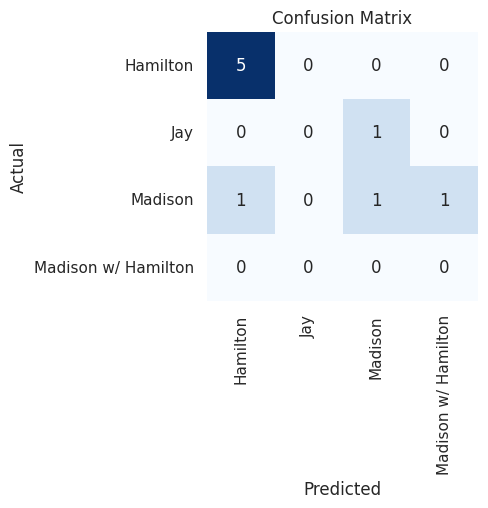

In [ ]:
# Import decision tree model
tree = DecisionTreeClassifier().fit(X, y)

# Predict using test set
X_test = strat_test_set.drop(columns_to_drop, axis=1)
X_test = pd.DataFrame(X_test)
y_pred0 = tree.predict(X_test)

# Compute confusion matrix
y_test = strat_test_set['meta_author']
cm0 = confusion_matrix(y_test, y_pred0)

# Define labels for rows and columns
class_labels = ['Hamilton', 'Jay', 'Madison','Madison w/ Hamilton']
cm_df0 = pd.DataFrame(cm0, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df0, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2.2.b. Accuracy of varying depth of the tree from 1 to 15

Plot the accuracy (train and test) as you vary the depth of the tree from 1 to 15.

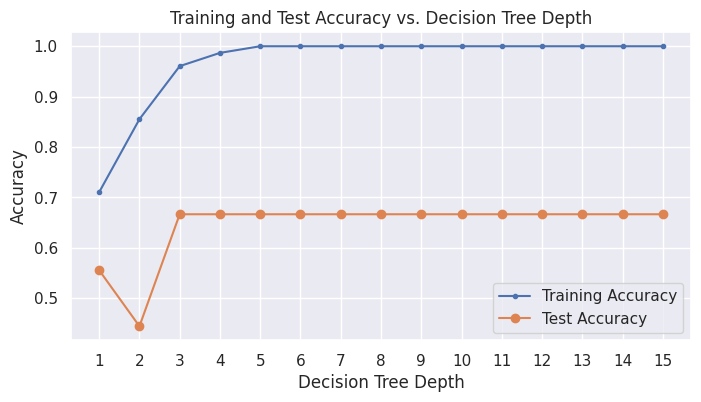

In [ ]:
# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Define depths to iterate over
depths = range(1, 16)

for depth in depths:
    # Create decision tree model with varying depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X, y)

    # Predict on training set
    y_train_pred = tree.predict(X)
    train_acc = accuracy_score(y, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plot the accuracies
plt.figure(figsize=(8, 4))
plt.plot(depths, train_accuracy, marker='.', label='Training Accuracy')
plt.plot(depths, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Training and Test Accuracy vs. Decision Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

### 2.2.c. Fine-tune data: Most frequently used words data

Study the code provided in the previous section and modify the code to choose words that appear more than 100 times in the entire dataset. Calculate the test set accuracy when using only the words appearing more than 100 times, compared the accuracy when using all the words.

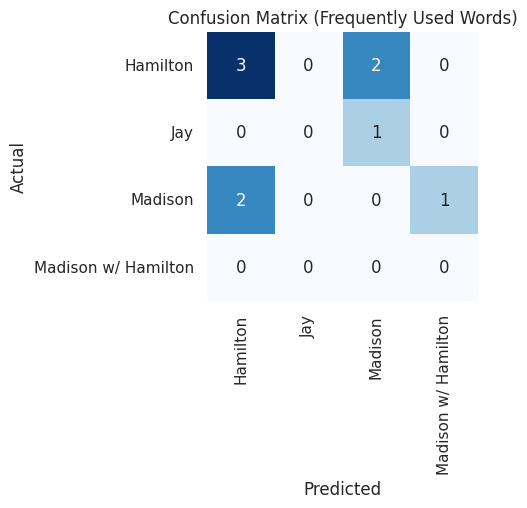

In [ ]:
# Calculate column counts
column_counts = {}
for column in strat_train_set.columns:
    if column != 'meta_author':
        column_counts[column] = strat_train_set[column].sum()

# Filter columns based on a threshold (e.g., more than 100 occurrences)
columns_to_keepm = [column for column,
                   count in column_counts.items() if count > 100]

# Prepare outcome and predictors with selected columns
X_train_m = strat_train_set[columns_to_keepm]
y_train = strat_train_set['meta_author']

# Train decision tree classifier
tree_filtered_m = DecisionTreeClassifier().fit(X_train_m, y_train)

# Transform and predict using test set with selected columns
X_test_m = strat_test_set[columns_to_keepm]
y_pred_filtered_m = tree_filtered_m.predict(X_test_m)

# Evaluate accuracy and confusion matrix
y_test = strat_test_set['meta_author']
cm_filtered_m = confusion_matrix(y_test, y_pred_filtered_m)
class_labels = ['Hamilton', 'Jay', 'Madison', 'Madison w/ Hamilton']
cm_df_filtered_m = pd.DataFrame(cm_filtered_m, index=class_labels,
                                columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df_filtered_m, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Frequently Used Words)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

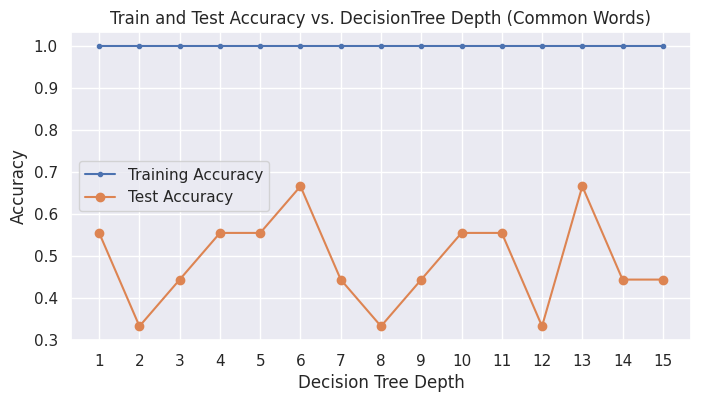

In [ ]:
# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Define depths to iterate over
depths = range(1, 16)

for depth in depths:
    # Create decision tree model with varying depth
    tree_filtered_m = DecisionTreeClassifier().fit(X_train_m, y_train)

    # Predict on training set
    y_train_pred = tree_filtered_m.predict(X_train_m)
    train_acc = accuracy_score(y, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    y_test_pred = tree_filtered_m.predict(X_test_m)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plot the accuracies
plt.figure(figsize=(8, 4))
plt.plot(depths, train_accuracy, marker='.', label='Training Accuracy')
plt.plot(depths, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy vs. DecisionTree Depth (Common Words)')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

### 2.2.d. Fine-tune data: Less frequently used words data

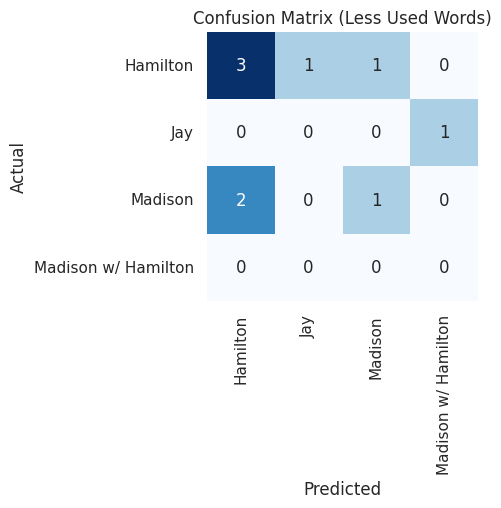

In [ ]:
# Calculate column counts
column_counts = {}
for column in strat_train_set.columns:
    if column != 'meta_author':
        column_counts[column] = strat_train_set[column].sum()

# Filter columns based on a threshold (e.g., less than 100 occurrences)
columns_to_keepl = [column for column,
                   count in column_counts.items() if count < 2]

# Prepare outcome and predictors with selected columns
X_train_l = strat_train_set[columns_to_keepl]
y_train = strat_train_set['meta_author']

# Train decision tree classifier
tree_filtered_l = DecisionTreeClassifier().fit(X_train_l, y_train)

# Transform and predict using test set with selected columns
X_test_l = strat_test_set[columns_to_keepl]
y_pred_filtered_l = tree_filtered_l.predict(X_test_l)

# Evaluate accuracy and confusion matrix
y_test = strat_test_set['meta_author']
cm_filtered_l = confusion_matrix(y_test, y_pred_filtered_l)
class_labels = ['Hamilton', 'Jay', 'Madison', 'Madison w/ Hamilton']
cm_df_filtered_l = pd.DataFrame(cm_filtered_l, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df_filtered_l, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Less Used Words)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

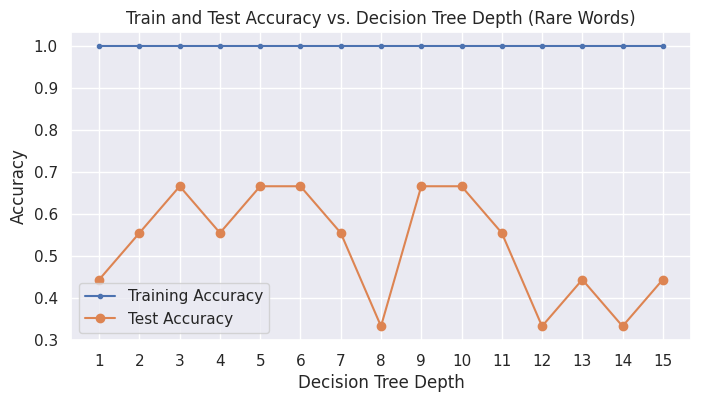

In [ ]:
# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Define depths to iterate over
depths = range(1, 16)

for depth in depths:
    # Create decision tree model with varying depth
    tree_filtered_l = DecisionTreeClassifier().fit(X_train_l, y_train)

    # Predict on training set
    y_train_pred = tree_filtered_l.predict(X_train_l)
    train_acc = accuracy_score(y, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    y_test_pred = tree_filtered_l.predict(X_test_l)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plot the accuracies
plt.figure(figsize=(8, 4))
plt.plot(depths, train_accuracy, marker='.', label='Training Accuracy')
plt.plot(depths, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Decision Tree Depth (Rare Words)')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

### 2.2.e. Compare accuracies of text data Decision Trees

In [ ]:
# Calculate Accuracies
text_dt_accu = accuracy_score(y_test, y_pred0)
acc_f_less = accuracy_score(y_test, y_pred_filtered_l)
acc_f_more = accuracy_score(y_test, y_pred_filtered_m)

# Creat a table with headers and data
table = [
    {"Model": "Standard Decision Tree", "Accuracy": text_dt_accu},
    {"Model": "Decision Tree with Most Frequently Used Words",
     "Accuracy": acc_f_more},
    {"Model": "Decision Tree with Less Frequently Used Words",
     "Accuracy": acc_f_less}]

# Printing the table
print(tabulate(table, headers="keys", floatfmt=".4f"))

Model                                            Accuracy
---------------------------------------------  ----------
Standard Decision Tree                             0.6667
Decision Tree with Most Frequently Used Words      0.3333
Decision Tree with Less Frequently Used Words      0.4444


## 2.3. Audio Data (Drum Sounds):
The goal is to develop a decision tree model for the text dataset.

### Data Preparation

In [ ]:
# Upload data set
audio_df = pd.read_csv('audio_data.csv')
audio_df.tail()

,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
207,207,Tribal.wav,kick,1,9.204979,64.264250,19.343864,1.680365,0.279789,0.119192,...,3.352176e-05,2.679482e-05,1.295772e-05,4.858955e-06,1.109925e-06,3.457487e-07,1.183265e-07,3.482341e-08,5.417589e-09,7.433700e-11
208,208,Underwrld.wav,kick,1,5.962220,48.803955,6.895373,0.342886,0.040850,0.009579,...,8.376791e-07,5.638807e-07,4.260118e-07,2.486883e-07,8.648508e-08,2.003724e-08,5.816964e-09,1.582104e-09,2.075823e-10,1.261096e-11
209,209,Warm Kick.wav,kick,1,1.850718,15.174830,3.197997,0.095534,0.008448,0.003922,...,1.523902e-07,1.435974e-07,6.953098e-08,4.212445e-08,1.679022e-08,3.639891e-09,9.746179e-10,3.028268e-10,3.613099e-11,1.216006e-11
210,210,WeR Borg.wav,kick,1,27.655157,90.222960,24.460987,1.272460,0.052114,0.037430,...,1.739745e-03,4.541307e-03,3.899693e-03,1.716535e-03,6.538050e-04,1.149198e-04,2.305735e-05,3.892038e-06,9.151934e-07,5.726265e-08
211,211,Xpando.wav,kick,1,7.138189,30.516200,7.688727,0.255315,0.053925,0.011486,...,2.063742e-07,1.275908e-07,8.293779e-08,4.887637e-08,2.067338e-08,6.100785e-09,1.417680e-09,3.932803e-10,6.924179e-11,7.677484e-12


In [ ]:
# General information
audio_df.info()
audio_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Columns: 133 entries, Unnamed: 0 to 11025.00 hz
dtypes: float64(129), int64(2), object(2)
memory usage: 220.4+ KB


,Unnamed: 0,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02
mean,105.500000,0.448113,3.624958,17.416965,8.596787,3.566502,1.000167,0.591471,0.458107,0.272973,...,5.081631e-04,3.644158e-04,2.388318e-04,1.298940e-04,5.193798e-05,1.519868e-05,3.533626e-06,6.712768e-07,9.091606e-08,6.313396e-09
std,61.343296,0.498478,6.942545,26.438515,9.235777,4.788102,1.544003,1.183579,1.033818,0.438555,...,8.586429e-04,6.526129e-04,4.844244e-04,2.545205e-04,1.072925e-04,3.001521e-05,6.106023e-06,1.313119e-06,1.898266e-07,1.143963e-08
min,0.000000,0.000000,0.001527,0.000948,0.003451,0.023271,0.004121,0.001391,0.000347,0.000163,...,3.621452e-08,3.443271e-08,1.849979e-08,5.991134e-09,4.987205e-09,8.123556e-10,3.550325e-10,8.939242e-11,8.800568e-12,5.490084e-13
25%,52.750000,0.000000,0.064840,0.217712,2.332045,0.336935,0.076210,0.037117,0.017721,0.012821,...,4.174945e-06,2.944346e-06,1.856348e-06,8.194084e-07,2.636999e-07,1.042592e-07,1.984290e-08,3.470632e-09,4.616096e-10,5.699681e-11
50%,105.500000,0.000000,0.488410,3.617768,6.081414,1.707556,0.459056,0.260691,0.202617,0.118620,...,1.162325e-04,8.833813e-05,5.552127e-05,2.563628e-05,1.019511e-05,3.744049e-06,9.070992e-07,1.677709e-07,1.739184e-08,1.160822e-09
75%,158.250000,1.000000,4.309501,24.334535,11.312375,4.999953,1.197420,0.630419,0.550811,0.378223,...,6.407021e-04,4.739844e-04,2.912185e-04,1.680799e-04,6.742486e-05,1.851275e-05,4.349353e-06,7.235192e-07,9.673274e-08,7.282709e-09
max,211.000000,1.000000,66.582860,190.067730,56.203686,31.318716,10.232034,12.798109,12.753410,3.378856,...,5.823903e-03,4.541307e-03,3.899693e-03,2.203800e-03,7.747787e-04,2.575438e-04,4.113468e-05,9.834714e-06,1.392894e-06,7.029924e-08


In [ ]:
# Visualize missing values
klib.missingval_plot(audio_df)

# Remove unnecessary variable
columns_to_drop = ['Unnamed: 0','label_text','filename' ]
df_cleaned = audio_df.drop(columns=columns_to_drop)
df_cleaned.head()

No missing values found in the dataset.


,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,689.06 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,1.962373,0.752758,0.422277,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,0.167692,0.152230,0.117283,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,0.197447,0.055508,0.085986,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,0.779680,0.111111,0.005692,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,0.060803,0.110663,0.037746,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [ ]:
# Outcome classes
outcome_types = audio_df['label_text'].unique()
print("Label text:",outcome_types)

outcome_types = df_cleaned['label'].unique()
print("Label num:",outcome_types)

Label text: ['snare' 'kick']
Label num: [0 1]


In [ ]:
# Shuffle and split data set
np.random.seed(42)

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(df_cleaned,
                                              df_cleaned["label"]):
    strat_train_set_n = df_cleaned.iloc[train_index]
    strat_test_set_n = df_cleaned.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

    strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
# Proportion of each outcome class of the train set
strat_train_set["label"].value_counts() / len(strat_train_set)

label
0    0.550296
1    0.449704
Name: count, dtype: float64

### 2.3.a. Create a Decision Tree

Plot the accuracy (train and test) as you vary the depth of the tree from 1 to 15.

In [ ]:
# Prepare outcome and predictors
X = strat_train_set.drop('label', axis=1)
X = pd.DataFrame(X)
y = strat_train_set['label']

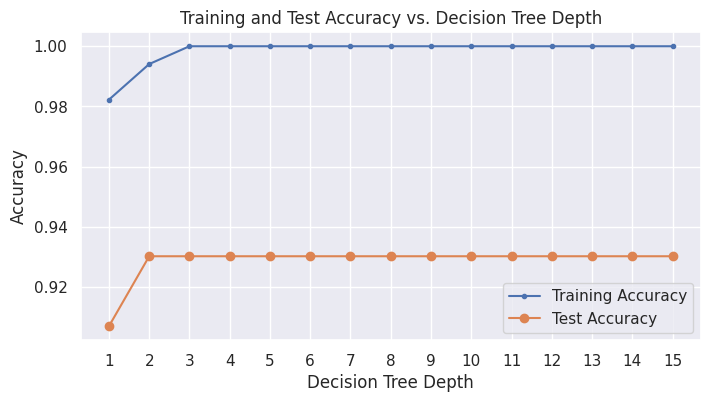

In [ ]:
# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Define depths to iterate over
depths = range(1, 16)

for depth in depths:
    # Create decision tree model with varying depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X, y)

    # Predict on training set
    y_train_pred = tree.predict(X)
    train_acc = accuracy_score(y, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    X_test = strat_test_set.drop('label', axis=1)
    X_test = pd.DataFrame(X_test)
    y_test = strat_test_set['label']
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plot the accuracies
plt.figure(figsize=(8, 4))
plt.plot(depths, train_accuracy, marker='.', label='Training Accuracy')
plt.plot(depths, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Training and Test Accuracy vs. Decision Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

### 2.3.b. Set the depth of the decision tree to 5

Set the depth of the tree to 5. Plot the tree

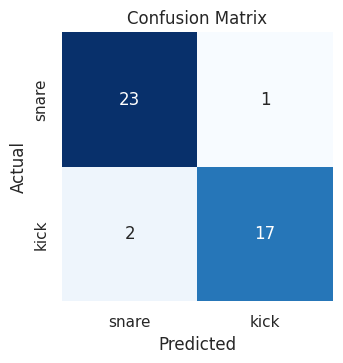

Accuracy at tree depth of 5 = 0.9302


In [ ]:
# Import decision tree model
tree = DecisionTreeClassifier(max_depth=5).fit(X, y)

# Predict using test set
y_pred = tree.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for rows and columns
class_labels = ['snare', 'kick']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Score
test_acc = round(accuracy_score(y_test, y_pred),4)
print("Accuracy at tree depth of 5 =",test_acc)

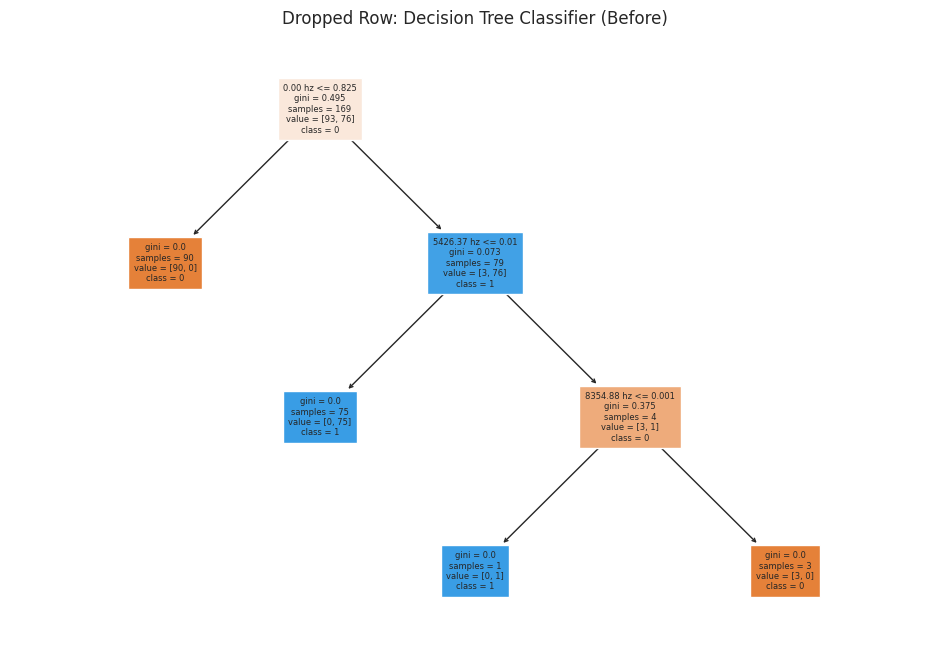

In [ ]:
# Convert feature and class names to string if they are not already
feature_names = X.columns.astype(str).tolist()
class_names = tree.classes_.astype(str).tolist()

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=feature_names,
          class_names=class_names, fontsize = 6)
plt.title("Dropped Row: Decision Tree Classifier (Before)")
plt.show()

### 2.3.c. Dropping 1 training example from the training set

Display “before” and “after” decision trees in
your pdf submission

In [ ]:
# Drop a random sample row from the training set
random_index = np.random.choice(df_cleaned.index)
df_dropped = df_cleaned.drop(random_index)

# Shuffle and split data set
np.random.seed(42)

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(df_dropped,
                                              df_dropped["label"]):
    strat_train_set_n = df_dropped.iloc[train_index]
    strat_test_set_n = df_dropped.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

    strat_train_set1, strat_test_set1 = strat_splits[0]

# Prepare outcome and predictors
X1 = strat_train_set1.drop('label', axis=1)
X1 = pd.DataFrame(X1)
y1 = strat_train_set1['label']
X1_test = strat_test_set1.drop('label', axis=1)
X1_test = pd.DataFrame(X1_test)
y1_test = strat_test_set1['label']

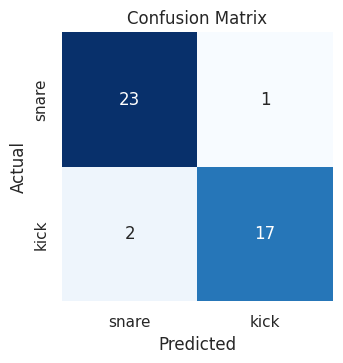

Accuracy at tree depth of 5 = 0.9302


In [ ]:
# Import decision tree model
tree1 = DecisionTreeClassifier(max_depth=5).fit(X1, y1)

# Predict using test set
y1_pred = tree1.predict(X1_test)

# Compute confusion matrix
cm1 = confusion_matrix(y1_test, y1_pred)

# Define labels for rows and columns
class_labels = ['snare', 'kick']
cm_df1 = pd.DataFrame(cm1, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(3.5, 3.5))
sns.heatmap(cm_df1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Score
test_acc1 = round(accuracy_score(y1_test, y1_pred),4)
print("Accuracy at tree depth of 5 =",test_acc1)

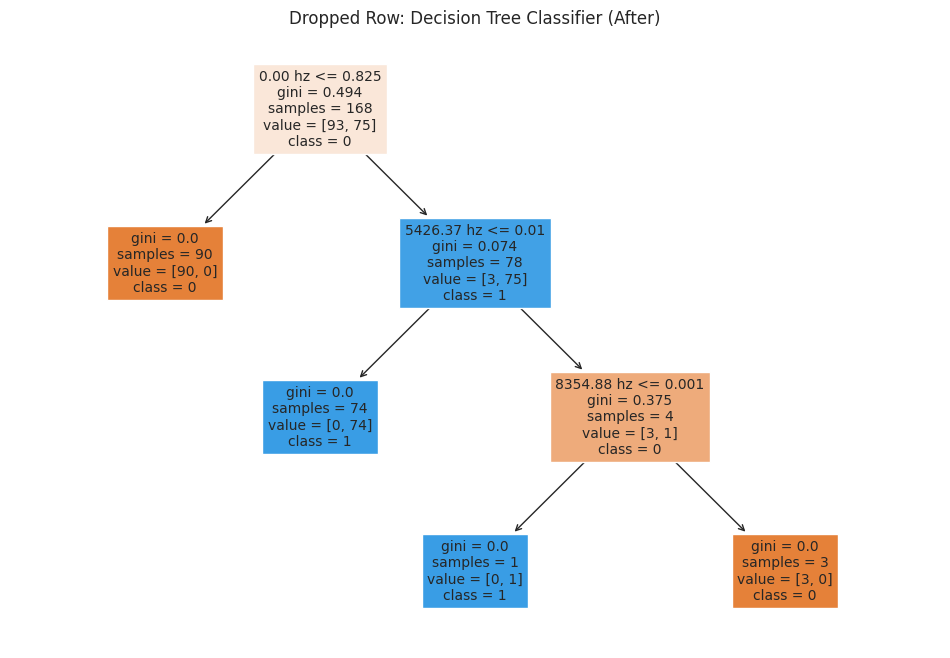

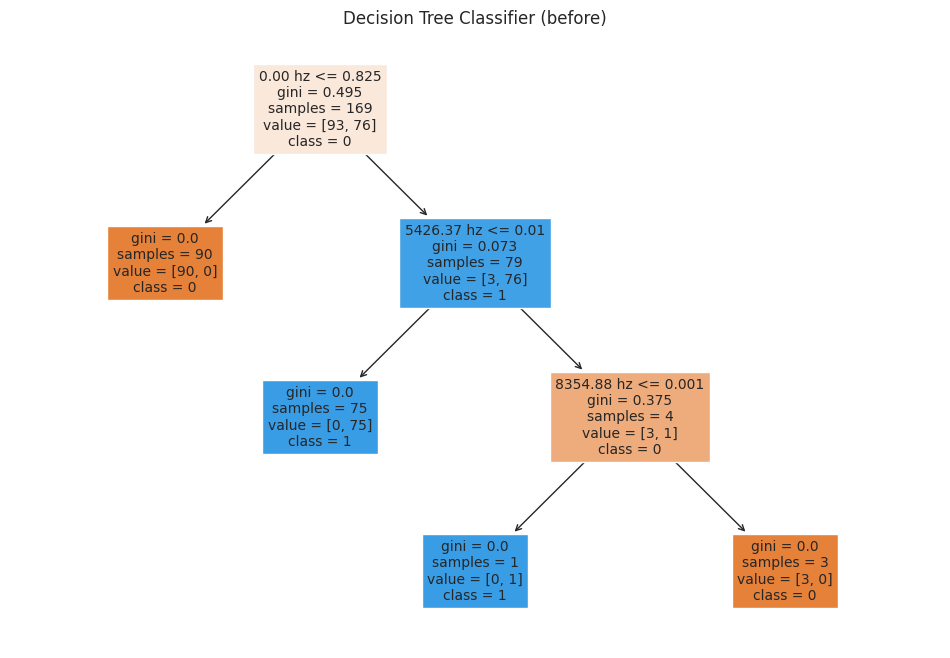

In [ ]:
# Convert feature and class names to string if they are not already
feature_names1 = X1.columns.astype(str).tolist()
class_names1 = tree1.classes_.astype(str).tolist()

# Plot decision tree (After)
plt.figure(figsize=(12, 8))
plot_tree(tree1, filled=True, feature_names=feature_names1,
          class_names=class_names1, fontsize = 10)
plt.title("Dropped Row: Decision Tree Classifier (After)")
plt.show()

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=feature_names,
          class_names=class_names, fontsize = 10)
plt.title("Decision Tree Classifier (before)")
plt.show()

## **3. Cross Validation**
Cross-validation and model selection.\
Plot accuracy vs. depth of the decision tree using Audio data set.

### 3.1.a Split the data in this audio dataset at 50% Test


In [ ]:
# Reload cleaned dataset
df_cleaned.head()

,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,689.06 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,1.962373,0.752758,0.422277,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,0.167692,0.152230,0.117283,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,0.197447,0.055508,0.085986,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,0.779680,0.111111,0.005692,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,0.060803,0.110663,0.037746,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [ ]:
# Split to Train and Test Data Set
np.random.seed(42)
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=42)

### 3.1.b. BadClassifiers Code at 50% Test
As you can see from the source code, this will make random guesses of labels, but no learning is going on.

In [ ]:
 # Bad Classifier

 class BadClassifier():
  def __init__(self):
    pd = __import__('pandas')
    self.label_counts = pd.Series()
  def train(self, y_train):
    train_labels = pd.Series(y_train)
    label_counts = train_labels.value_counts(normalize=True)
    self.label_counts = label_counts.sort_index()
  def make_random_predictions(self, X_test):
    pred_labels=[]
    test_labels = pd.Series(y_test)
    test_label_counts = np.random.multinomial(X_test.shape[0],
                                              self.label_counts.values)
    for count,label in zip (test_label_counts,self.label_counts.index.values):
      pred_labels = pred_labels + [label for x in range(0,count)]
    np.random.shuffle(pred_labels)
    return pred_labels

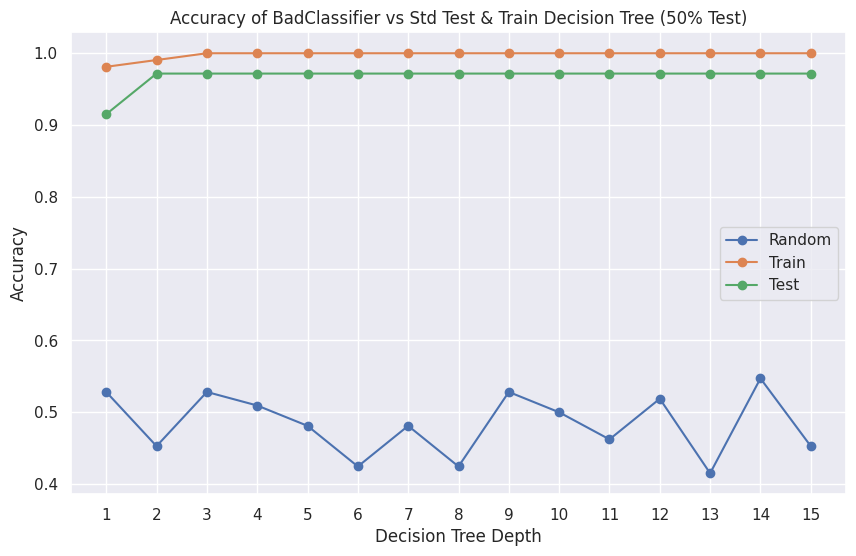

In [ ]:
# Plotting Bad Classifier Performance Metrix
bad = BadClassifier()
accuracy = []
train_accuracy = []
test_accuracy = []

for x in range(1, 16):
    # Random prediction with BadClassifier
    bad.train(y_train)
    y_pred = bad.make_random_predictions(X_test)
    bad_acc = accuracy_score(y_test, y_pred)
    accuracy.append(bad_acc)

    # Decision tree classifier
    sound_trees = DecisionTreeClassifier(max_depth=x, random_state=42)
    sound_trees.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = sound_trees.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    y_test_pred = sound_trees.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracy, marker='o', label='Random')
plt.plot(range(1, 16), train_accuracy, marker='o', label='Train')
plt.plot(range(1, 16), test_accuracy, marker='o', label='Test')
plt.title('Accuracy of BadClassifier vs Std Test & Train Decision Tree (50% Test)')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.legend()
plt.grid(True)
plt.show()

### 3.1.c. Repeat 3.1.b. with 0.01 test set

Repeat above step but this time use only 1% of data for testing

In [ ]:
# Split to Train and Test Data Set
np.random.seed(42)
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.01,
                                                    random_state=42)

In [ ]:
# Bad Classifier

class BadClassifier():
  def __init__(self):
    pd = __import__('pandas')
    self.label_counts = pd.Series()
  def train(self, y_train):
    train_labels = pd.Series(y_train)
    label_counts = train_labels.value_counts(normalize=True)
    self.label_counts = label_counts.sort_index()
  def make_random_predictions(self, X_test):
    pred_labels=[]
    test_labels = pd.Series(y_test)
    test_label_counts = np.random.multinomial(X_test.shape[0],
                                              self.label_counts.values)
    for count,label in zip (test_label_counts,self.label_counts.index.values):
      pred_labels = pred_labels + [label for x in range(0,count)]
    np.random.shuffle(pred_labels)
    return pred_labels

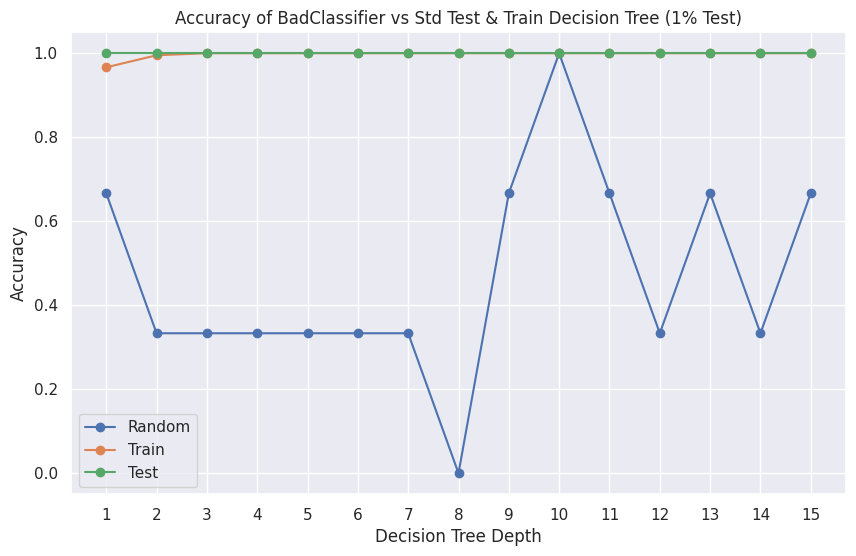

In [ ]:
# Plotting Bad Classifier Performance Metrix
bad = BadClassifier()
accuracy = []
train_accuracy = []
test_accuracy = []

for x in range(1, 16):
    # Random prediction with BadClassifier
    bad.train(y_train)
    y_pred = bad.make_random_predictions(X_test)
    bad_acc = accuracy_score(y_test, y_pred)
    accuracy.append(bad_acc)

    # Decision tree classifier
    sound_trees = DecisionTreeClassifier(max_depth=x, random_state=42)
    sound_trees.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = sound_trees.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)

    # Predict on test set
    y_test_pred = sound_trees.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracy, marker='o', label='Random')
plt.plot(range(1, 16), train_accuracy, marker='o', label='Train')
plt.plot(range(1, 16), test_accuracy, marker='o', label='Test')
plt.title('Accuracy of BadClassifier vs Std Test & Train Decision Tree (1% Test)')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.legend()
plt.grid(True)
plt.show()